In [1]:
library(ape)
library(phytools)
library(geiger)
library(phylolm)
library(caper)
library(vioplot)

Warning message:
"package 'phytools' was built under R version 4.3.2"
Loading required package: maps

Warning message:
"package 'maps' was built under R version 4.3.2"
Loading required package: MASS

Loading required package: mvtnorm

Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information


Attaching package: 'sm'


The following object is masked from 'package:MASS':

    muscle


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
ddata <- read.csv('..//data//Data_mammalia_150.csv')
ttree <- read.nexus('..//data//1000_random_phylogenies_consensus _Vertlife.nexus')

ddata$phy_label <- gsub(" ","_",ddata$taxon_species)
row.names(ddata) <- ddata$phy_label

In [3]:
# return dataframe data and phylogenetic tree
prunDataTree <- function(data_data, data_tree, varc){
  # data_data, data.frame
  # data_tree, phylogenetic tree
  # varc, variable list, ie, varc = list(y='y_var', x='x_var',...)
  varc_values = unlist(varc, use.names = FALSE)
  data_sub <- data_data[complete.cases(data_data[varc_values]),]
  chk <- name.check(data_tree, data_sub)
  
  ttree.sub <- drop.tip(data_tree, chk$tree_not_data)
  ddata.sub <- data_sub[! rownames(data_sub) %in% chk$data_not_tree,]
  ddata.sub <- ddata.sub[order(ddata.sub$taxon_family), ]
  
  ttree.sub <- multi2di(ttree.sub)
  ttree.sub$node.label <- 1:length(ttree.sub$node.label)
  return(list(phy=ttree.sub, data=ddata.sub))
}

In [9]:
table(ddata$mammalia_class)


    aquatic      flying terrestrial 
         23          14         113 

In [11]:
nrow(ddata[ddata$mammalia_class == "aquatic", ])

[1] 23

## distribution of proteome TAAI and HEP TAAI, Wilcoxon paired  test

### Fig. 2(A)


	Wilcoxon signed rank test with continuity correction

data:  ddata$TAAI_HEP and ddata$TAAI_proteome
V = 9876.5, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


[1] 150


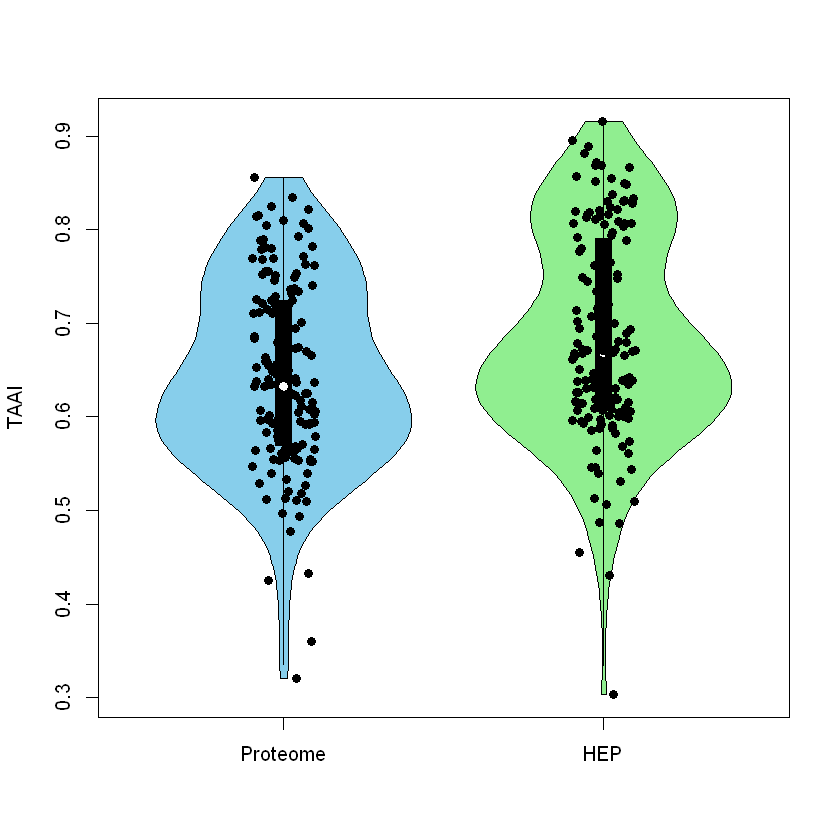

In [12]:
wilcox.test(ddata$TAAI_HEP,
            ddata$TAAI_proteome,
            alternative = "greater",
            paired = TRUE)

data <- list(TAAI_proteome = ddata$TAAI_proteome,
             TAAI_HEP = ddata$TAAI_HEP)

vioplot(data, 
        xlab = "",  
        ylab = "TAAI", 
        col = c("skyblue", "lightgreen"),
        names = c("Proteome", "HEP"),
        boxwidth = 0.5)

for (i in 1:length(data)) {
  stripchart(data[[i]], method = "jitter", vertical = TRUE, add = TRUE, pch = 19, col = "black", at = i)
}

print(nrow(ddata))

In [13]:
data_filter <- ddata[ddata$mammalia_class!='aquatic', ]
prun_data <- prunDataTree(data_filter,
                          ttree,
                          list(x1='GTres', x2='GT'))
pic_data <- prun_data

gt <- setNames(log(pic_data$data$GT), rownames(pic_data$data))
gtres <- setNames(pic_data$data$GTres, rownames(pic_data$data))
taai_proteome <- setNames(pic_data$data$TAAI_proteome, rownames(pic_data$data))
taai_hep <- setNames(pic_data$data$TAAI_HEP, rownames(pic_data$data))

# PIC
pic.gt <- pic(gt, pic_data$phy)
pic.gtres <- pic(gtres, pic_data$phy)
pic.taai.proteome <- pic(taai_proteome, pic_data$phy)
pic.taai.hep <- pic(taai_hep, pic_data$phy)

In [14]:
nrow(prun_data$data)

[1] 116

### GT ~ TAAI, GTres ~ TAAI

### Fig. 2(B)


	Pearson's product-moment correlation

data:  pic.gt and pic.taai.proteome
t = -2.5024, df = 113, p-value = 0.01376
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.39565570 -0.04805236
sample estimates:
       cor 
-0.2291466 


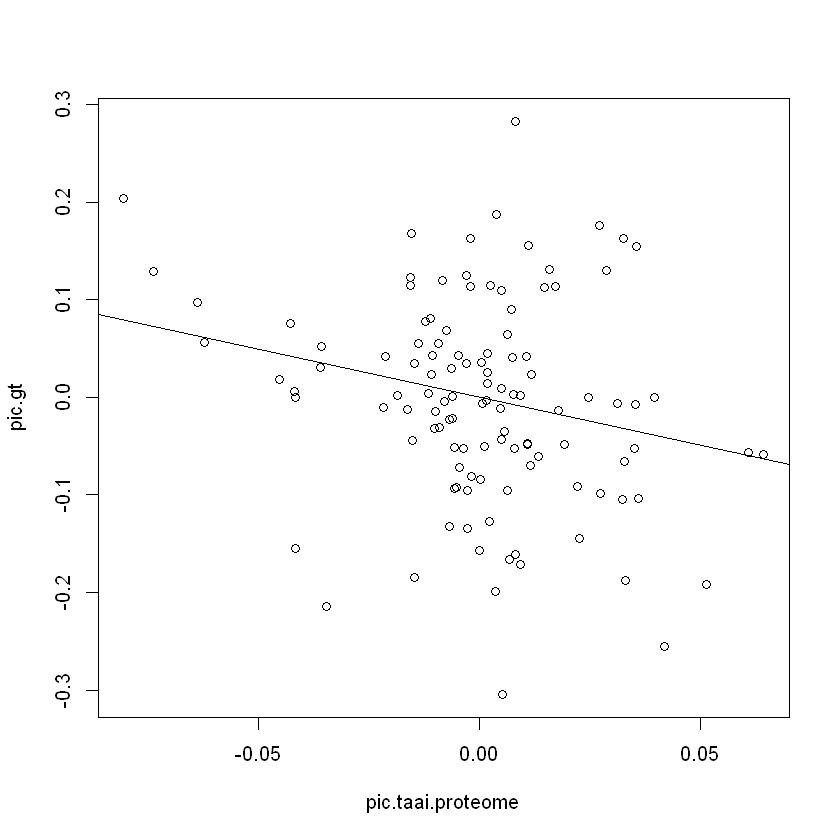

In [15]:
cor.test(pic.gt, pic.taai.proteome)
plot(pic.gt ~ pic.taai.proteome)
abline(lm(pic.gt ~ pic.taai.proteome-1))

### long-GTs (GTres > 1) VS short GTs (GTres < 1)

### Fig. 2(C)


	Wilcoxon rank sum test with continuity correction

data:  data_short_lived$TAAI_proteome and data_long_lived$TAAI_proteome
W = 2087.5, p-value = 0.01227
alternative hypothesis: true location shift is greater than 0


[1] 116


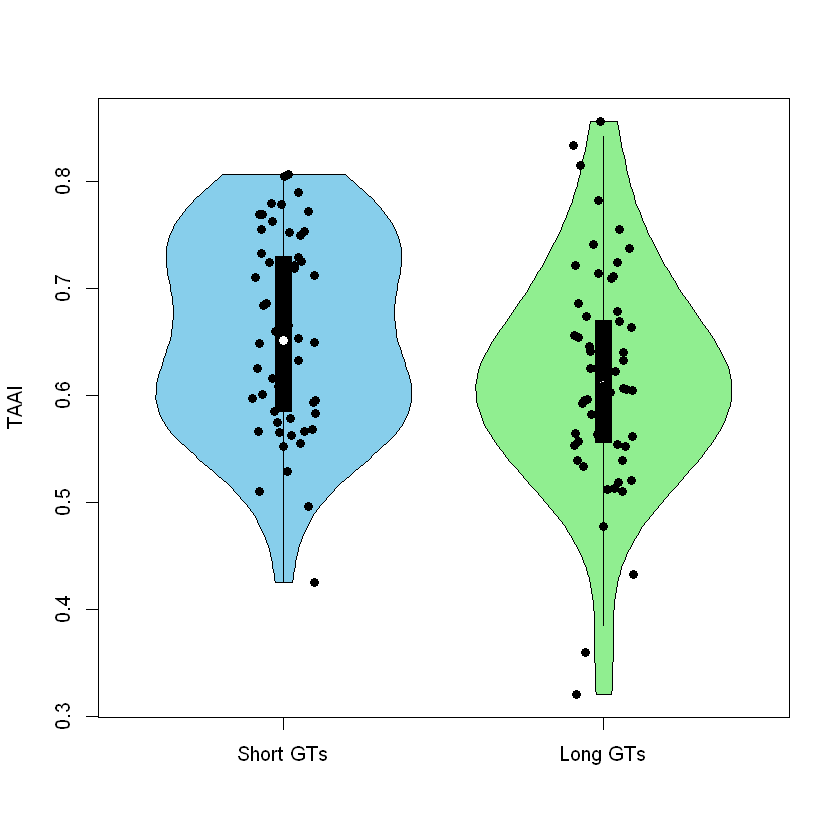

In [23]:
ddata_ter <- ddata[ddata$mammalia_class!='aquatic' & !is.na(ddata$GTres),]
data_long_lived  <- ddata_ter[ddata_ter$GTres>1,]
data_short_lived <- ddata_ter[ddata_ter$GTres<1,]


wilcox.test(data_short_lived$TAAI_proteome, 
            data_long_lived$TAAI_proteome, 
            alternative = "greater",
            paired = FALSE)

data <- list(Short_GTs = data_short_lived$TAAI_proteome,
             Long_GTs = data_long_lived$TAAI_proteome)

vioplot(data, 
        xlab = "",  
        ylab = "TAAI", 
        col = c("skyblue", "lightgreen"),
        names = c("Short GTs", "Long GTs"),
        boxwidth = 0.5)

for (i in 1:length(data)) {
  stripchart(data[[i]], method = "jitter", vertical = TRUE, add = TRUE, pch = 19, col = "black", at = i)
}
print(nrow(ddata_ter))

In [17]:
nrow(data_short_lived)

[1] 56

In [18]:
nrow(data_long_lived)

[1] 60

In [24]:
median(data_short_lived$TAAI_proteome)

[1] 0.6513583

In [25]:
median(data_long_lived$TAAI_proteome)

[1] 0.6091757

In [26]:
wilcox.test(data_short_lived$TAAI_HEP, 
            data_long_lived$TAAI_HEP, 
            alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  data_short_lived$TAAI_HEP and data_long_lived$TAAI_HEP
W = 2342, p-value = 0.0001287
alternative hypothesis: true location shift is greater than 0


### Fig. 2(D)


	Pearson's product-moment correlation

data:  pic.gtres and pic.taai.proteome
t = -4.1642, df = 113, p-value = 6.131e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5135559 -0.1946340
sample estimates:
       cor 
-0.3647451 


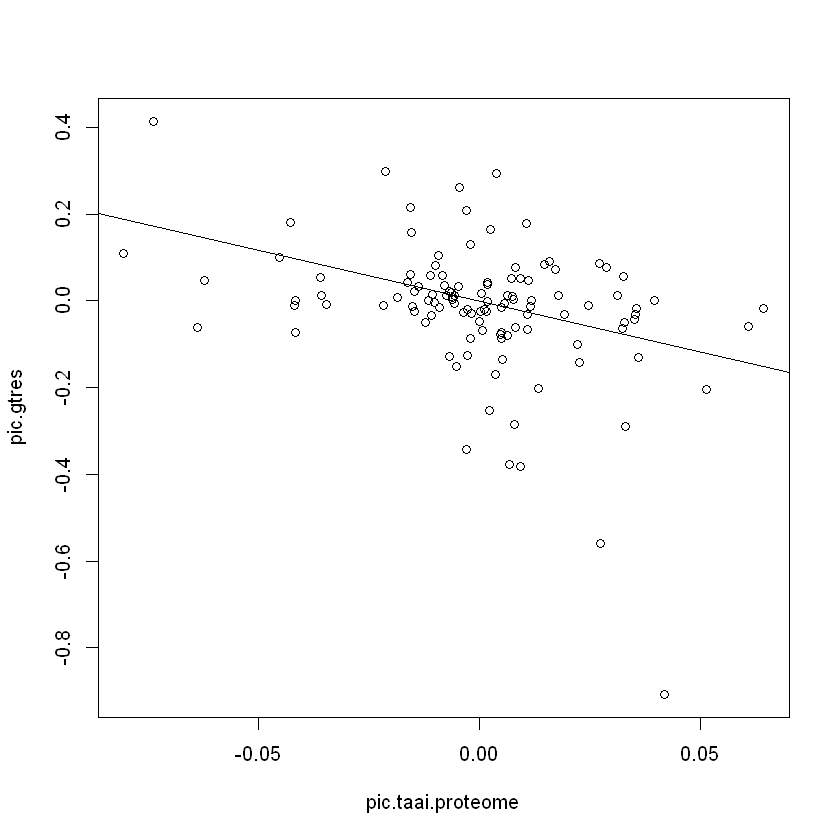

In [27]:
cor.test(pic.gtres, pic.taai.proteome)
plot(pic.gtres ~ pic.taai.proteome)
abline(lm(pic.gtres ~ pic.taai.proteome-1))

In [28]:
# PGLS 'BM','lambda','kappa','delta','OUfixedRoot', The best model
Optimum_model_pgls <- function(data_chose, tree_all, varc_multiple){
  # varc = list(y='y1_var', x1='y2_var', x2='x_var')
  print(varc_multiple)
  model_method_list = c('BM','lambda','kappa','delta','OUfixedRoot')

  df_pgls  <- list()
  sub_data <- prunDataTree(data_chose, tree_all, varc_multiple)

  formula_str <- paste(varc_multiple$y, "~", paste(varc_multiple[-1], collapse = " + "))
  formula_obj <- as.formula(formula_str)
  print(formula_str)

  for (model_method in model_method_list){
    modle.pgls <- phylolm(formula_obj, 
                          data = sub_data$data, 
                          phy  = sub_data$phy, 
                          model = model_method)

    pgls_summary = list()
    summary_model <- data.frame(summary(modle.pgls)$coefficients)
    pgls_summary[['model_name']] <- model_method
    pgls_summary[['adj_r2']] <- modle.pgls$adj.r.squared
      pgls_summary[['N']] <- nrow(sub_data$data)

    for (r in rownames(summary_model)){
        for (c in names(summary_model)){
            name_value = paste(c(r,c), collapse='_')
            pgls_summary[[name_value]] <- summary_model[r,c]
        }
    }

    df_pgls <- rbind(df_pgls, pgls_summary)
  }
  return(data.frame(df_pgls))
}

In [29]:
ddata_pngr_mass <- ddata[ddata$mammalia_class!='aquatic',]
ddata_pngr_mass <- ddata_pngr_mass[!is.na(ddata_pngr_mass$mass) &
                                   !is.na(ddata_pngr_mass$PNGR),]

ddata_pngr_mass['mass_log'] <- log(ddata_pngr_mass['mass'])
ddata_pngr_mass['pngr_log'] <- log(ddata_pngr_mass['PNGR'])

summary_pgls_PNGR<- Optimum_model_pgls(ddata_pngr_mass
                                      ,ttree
                                      ,list(y='pngr_log',x1='mass_log',x2='TAAI_proteome'))

$y
[1] "pngr_log"

$x1
[1] "mass_log"

$x2
[1] "TAAI_proteome"

[1] "pngr_log ~ mass_log + TAAI_proteome"


Warning message in phylolm(formula_obj, data = sub_data$data, phy = sub_data$phy, :
"the estimation of delta matches the upper/lower bound for this parameter.
                          You may change the bounds using options "upper.bound" and "lower.bound".
"


In [30]:
summary_pgls_PNGR

,model_name,adj_r2,N,X.Intercept._Estimate,X.Intercept._StdErr,X.Intercept._t.value,X.Intercept._p.value,mass_log_Estimate,mass_log_StdErr,mass_log_t.value,mass_log_p.value,TAAI_proteome_Estimate,TAAI_proteome_StdErr,TAAI_proteome_t.value,TAAI_proteome_p.value
,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>
pgls_summary,BM,0.8807623,112,-5.500909,0.7880227,-6.980648,2.41231e-10,0.8045141,0.0282902,28.43791,3.029262e-52,1.142898,0.3726703,3.066779,0.002729065
pgls_summary.1,lambda,0.8901589,112,-5.360272,0.7094309,-7.555735,1.374337e-11,0.7968333,0.02684697,29.68057,4.855441e-54,1.028359,0.4115791,2.49857,0.01396178
pgls_summary.2,kappa,0.8862635,112,-5.407497,0.6186571,-8.740702,3.141257e-14,0.8010852,0.02758394,29.04173,3.996303e-53,1.004473,0.414472,2.423501,0.01701803
pgls_summary.3,delta,0.8909387,112,-5.466174,0.4444338,-12.29919,2.491284e-22,0.805843,0.02697408,29.87472,2.576763e-54,1.107918,0.3940865,2.811357,0.005851106
pgls_summary.4,OUfixedRoot,0.8923951,112,-5.457294,0.481037,-11.34485,3.612289e-20,0.8060147,0.02678002,30.09762,1.249941e-54,1.098096,0.3993686,2.749579,0.006987182


# maximum longevity VS TAAI analysis

## longevity (ML) ~ TAAI
## residuals of longevity (MLres) ~ TAAI

In [31]:
data_filter_longevity <- ddata[ddata$mammalia_class!='aquatic', ]
prun_data <- prunDataTree(data_filter_longevity,
                          ttree,
                          list(x1='MLres', x2='longevity'))
pic_data <- prun_data

ml <- setNames(log(pic_data$data$longevity), rownames(pic_data$data))
mlres <- setNames(pic_data$data$MLres, rownames(pic_data$data))
taai_proteome <- setNames(pic_data$data$TAAI_proteome, rownames(pic_data$data))
taai_hep <- setNames(pic_data$data$TAAI_HEP, rownames(pic_data$data))

# PIC
pic.ml <- pic(ml, pic_data$phy)
pic.mlres <- pic(mlres, pic_data$phy)
pic.taai.proteome <- pic(taai_proteome, pic_data$phy)
pic.taai.hep <- pic(taai_hep, pic_data$phy)

In [33]:
nrow(prun_data$data)

[1] 124


	Pearson's product-moment correlation

data:  pic.ml and pic.taai.proteome
t = 1.1926, df = 121, p-value = 0.2354
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07059923  0.27948371
sample estimates:
      cor 
0.1077822 


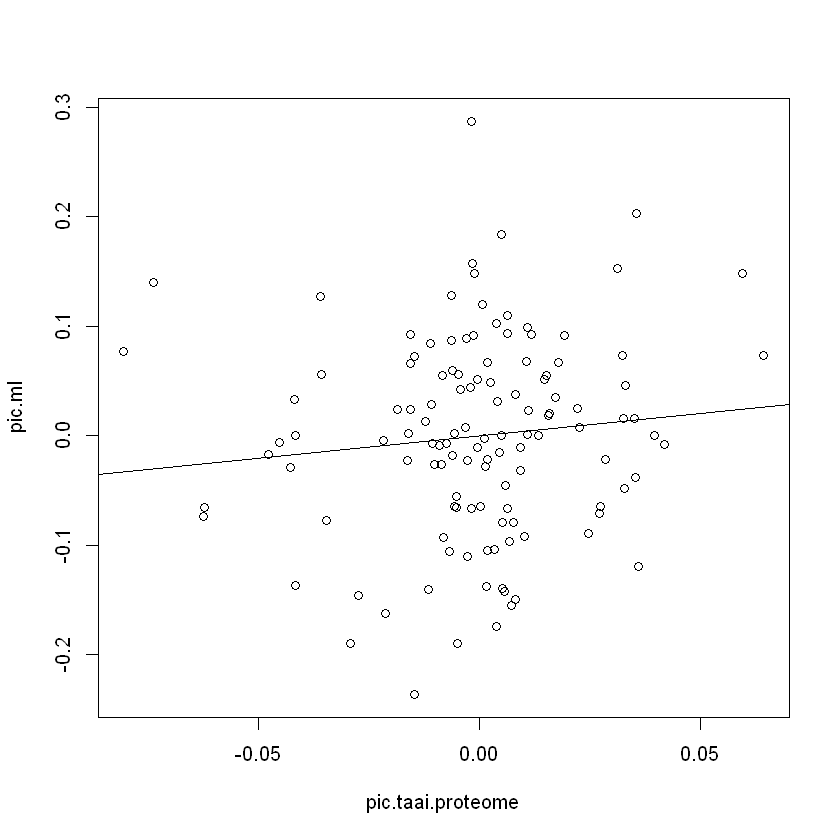

In [34]:
cor.test(pic.ml, pic.taai.proteome)
plot(pic.ml ~ pic.taai.proteome)
abline(lm(pic.ml ~ pic.taai.proteome-1))


	Pearson's product-moment correlation

data:  pic.mlres and pic.taai.proteome
t = 0.49409, df = 121, p-value = 0.6221
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1332210  0.2201571
sample estimates:
       cor 
0.04487166 


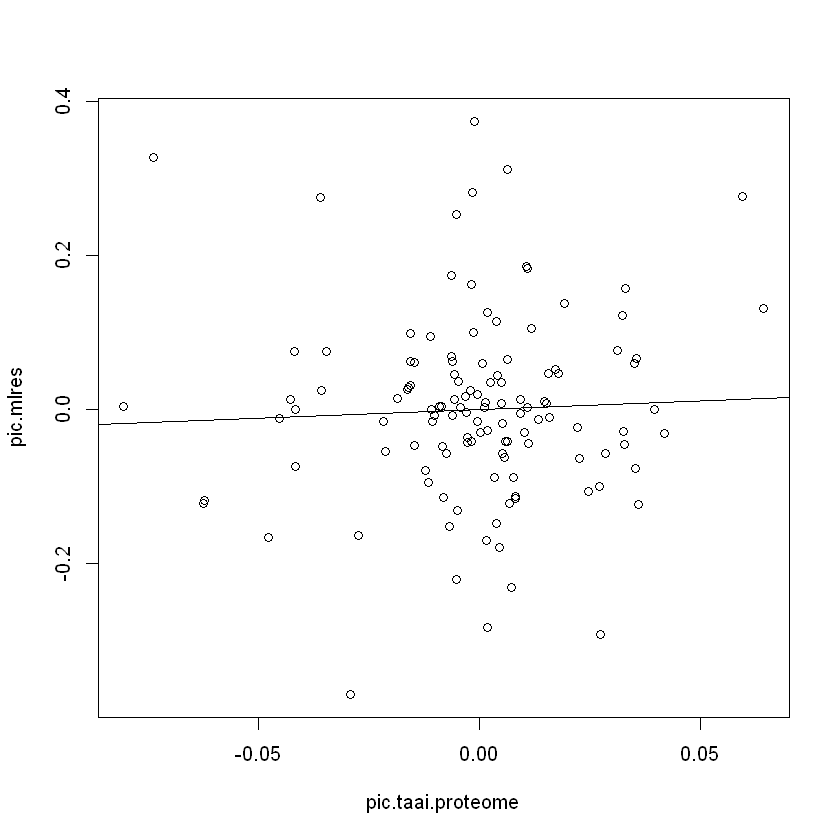

In [35]:
cor.test(pic.mlres, pic.taai.proteome)
plot(pic.mlres ~ pic.taai.proteome)
abline(lm(pic.mlres ~ pic.taai.proteome-1))

### we applied a threshold of GTres < 1 (fast-lived species) and MLres > 1 (long-lived species), to filter for mammals with shorter generation times but longer lifespans.

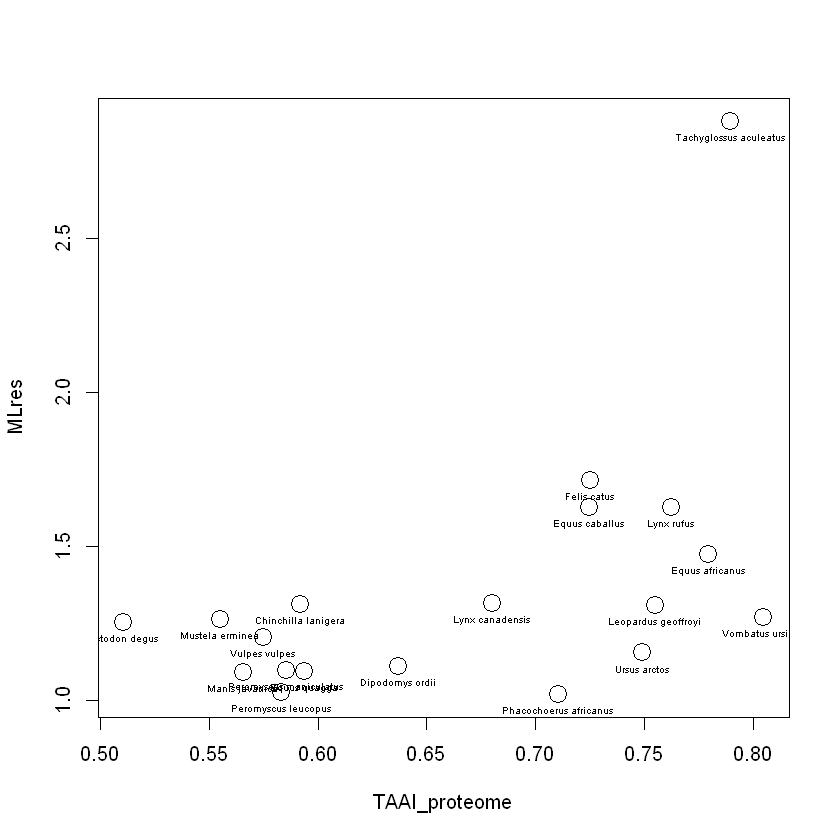

In [36]:
df_fast_slow <- ddata[ddata$mammalia_class!='aquatic' &
                     ddata$GTres<1 &
                     ddata$MLres>1,]

df_fast_slow <- df_fast_slow[!is.na(df_fast_slow$taxon_species),]

plot(MLres ~ TAAI_proteome, cex=2,data=df_fast_slow)
text(df_fast_slow$TAAI_proteome, 
     df_fast_slow$MLres, 
     df_fast_slow$taxon_species, 
     pos = 1,
     cex=0.5)

### Fig. 4


Phylogenetic signal lambda : 0.86242 
logL(lambda) : -5.37077 
LR(lambda=0) : 9.24316 
P-value (based on LR test) : 0.00236377 


Phylogenetic signal lambda : 0.622243 
logL(lambda) : 18.8963 
LR(lambda=0) : 0.99851 
P-value (based on LR test) : 0.317671 




Call:
phylolm(formula = MLres ~ TAAI_proteome, data = df_fast_slow_sig$data, 
    phy = df_fast_slow_sig$phy, model = "BM")

   AIC logLik 
 18.48  -6.24 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-0.7052 -0.4621 -0.3532 -0.1734  1.0006 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
sigma2: 0.00254846 

Coefficients:
              Estimate  StdErr t.value  p.value   
(Intercept)    0.35599 0.61728  0.5767 0.571690   
TAAI_proteome  1.92737 0.63493  3.0356 0.007466 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.3515	Adjusted R-squared: 0.3134 

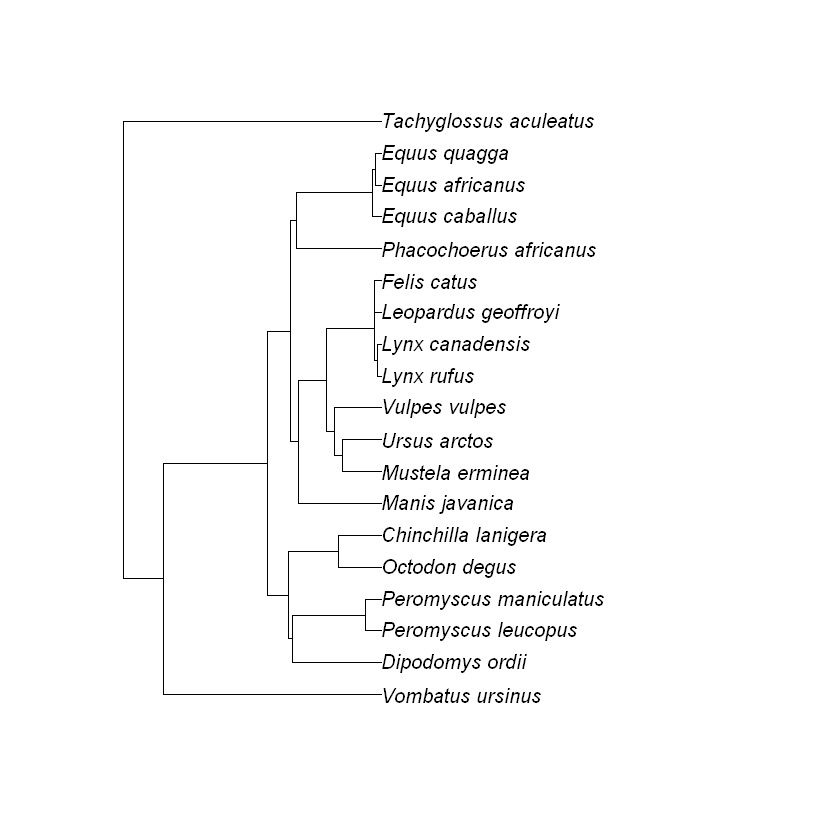

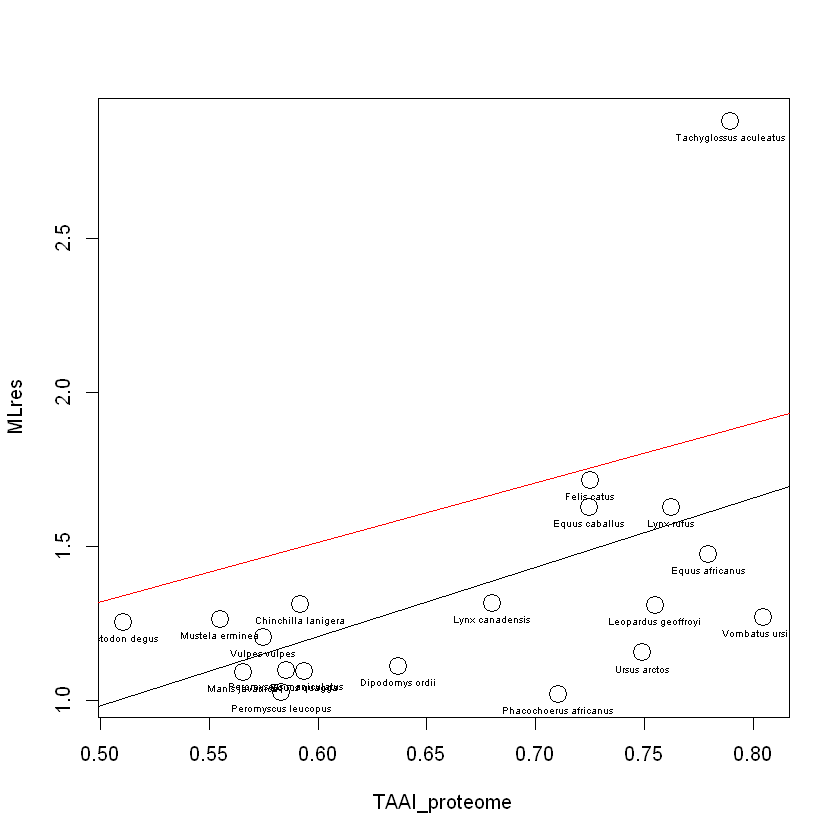

In [37]:
df_fast_slow_sig <- prunDataTree(df_fast_slow, 
                              ttree, 
                              list(x1='MLres', x2='TAAI_proteome'))

TAAI_proteome <- df_fast_slow_sig$data$TAAI_proteome
names(TAAI_proteome) <- rownames(df_fast_slow_sig$data)

MLres <- df_fast_slow_sig$data$MLres
names(MLres) <- rownames(df_fast_slow_sig$data)

print(phylosig(df_fast_slow_sig$phy, MLres, method = "lambda", test=T))
print(phylosig(df_fast_slow_sig$phy, TAAI_proteome, method = "lambda", test=T))

plot(df_fast_slow_sig$phy)

ols.model.new <- lm(MLres ~ TAAI_proteome,data=df_fast_slow_sig$data)

pgls.model.new <- phylolm(MLres ~ TAAI_proteome
                    ,data=df_fast_slow_sig$data
                    ,phy=df_fast_slow_sig$phy
                    ,model='BM')
summary(pgls.model.new)


plot(MLres ~ TAAI_proteome, cex=2,data=df_fast_slow)
text(df_fast_slow$TAAI_proteome, 
     df_fast_slow$MLres, 
     df_fast_slow$taxon_species, 
     pos = 1,
     cex=0.5)

abline(pgls.model.new, col='red')
abline(ols.model.new, col='black')

In [38]:
# outliers
lm.model <- lm(MLres ~ TAAI_proteome, data=df_fast_slow)
res<- residuals(lm.model)
res<- res/sqrt(var(res))[1]
out_s <- names(res)[(abs(res)>3)] 
# summary(lm.model)
cat('outliers:\t', out_s, '\n')
# outlier # 'Tachyglossus_aculeatus'

outliers:	 Tachyglossus_aculeatus 


### Supplement Fig.1


Call:
lm(formula = MLres ~ TAAI_proteome, data = df_fast_slow_sig_rmOutL$data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31281 -0.12893 -0.02865  0.11159  0.36498 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     0.5286     0.3302   1.601   0.1290  
TAAI_proteome   1.1322     0.4954   2.285   0.0363 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1884 on 16 degrees of freedom
Multiple R-squared:  0.2461,	Adjusted R-squared:  0.199 
F-statistic: 5.223 on 1 and 16 DF,  p-value: 0.03626



PGLS



Call:
phylolm(formula = MLres ~ TAAI_proteome, data = df_fast_slow_sig_rmOutL$data, 
    phy = df_fast_slow_sig_rmOutL$phy, model = "BM")

   AIC logLik 
13.776 -3.888 

Raw residuals:
     Min       1Q   Median       3Q      Max 
-0.23845 -0.00609  0.09574  0.27287  0.42883 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
sigma2: 0.002255111 

Coefficients:
              Estimate   StdErr t.value  p.value   
(Intercept)   -0.05841  0.56749 -0.1029 0.919300   
TAAI_proteome  1.85367  0.60070  3.0859 0.007087 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.3731	Adjusted R-squared: 0.3339 

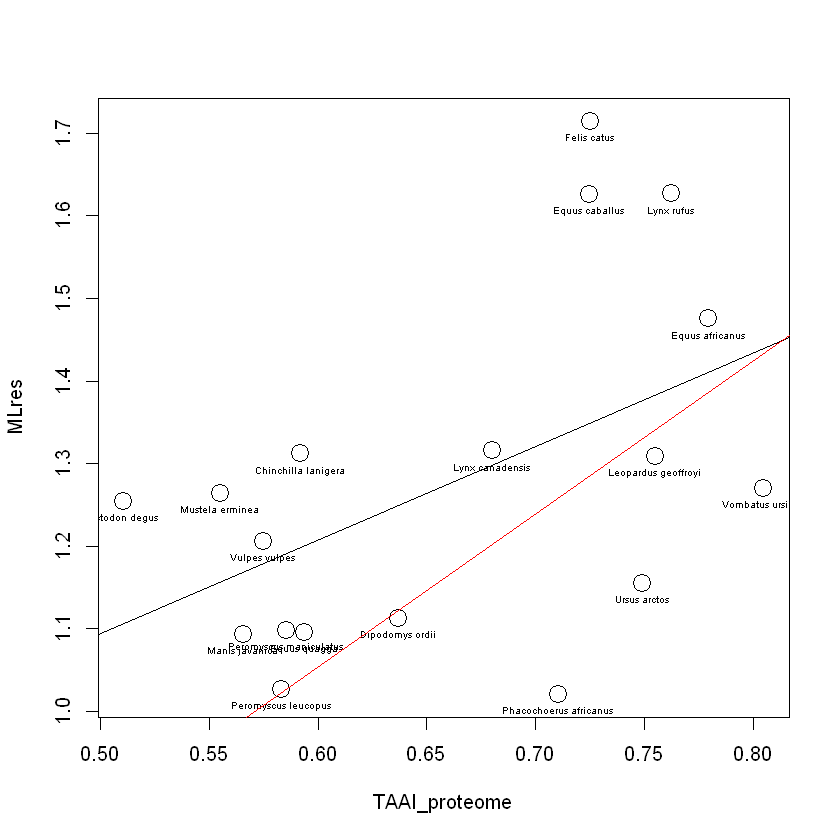

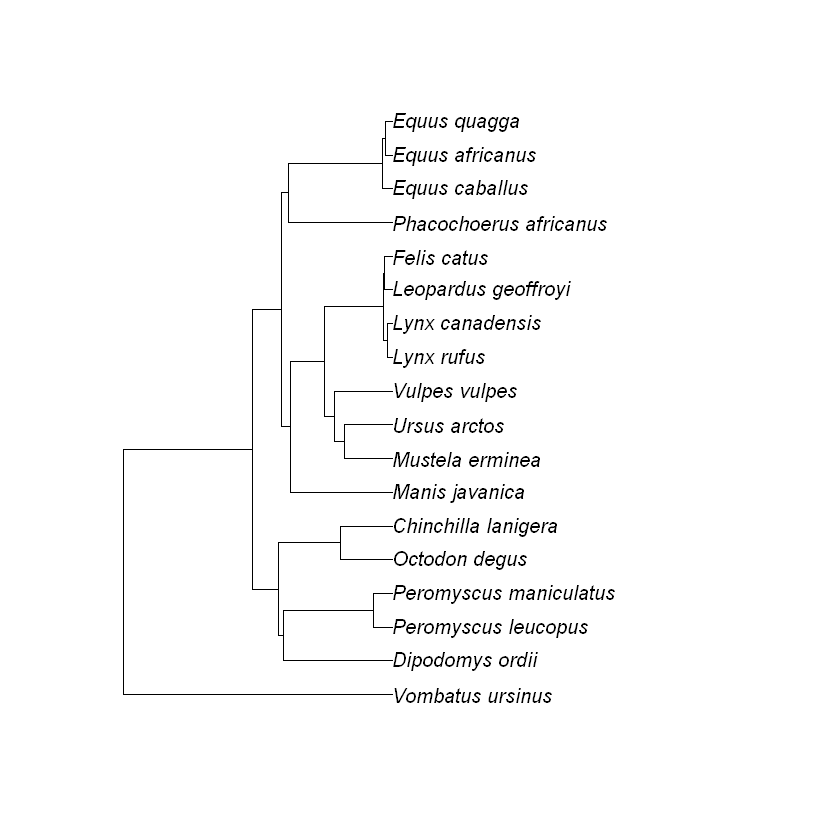

In [39]:
# remove outlier species Tachyglossus_aculeatus 

df_fast_slow_sig_rmOutL <- prunDataTree(df_fast_slow[df_fast_slow$taxon_species != 'Tachyglossus aculeatus',], 
                              ttree, 
                              list(x1='MLres', x2='TAAI_proteome'))

lm.mode.rmO <- lm(MLres ~ TAAI_proteome, 
                   data=df_fast_slow_sig_rmOutL$data)

# 'BM','lambda','kappa','delta','OUfixedRoot'
pgls.model.rmO <- phylolm(MLres ~ TAAI_proteome
                    ,data=df_fast_slow_sig_rmOutL$data
                    ,phy=df_fast_slow_sig_rmOutL$phy
                    ,model='BM')

summary(lm.mode.rmO)
cat('\nPGLS\n')
summary(pgls.model.rmO)

plot(MLres ~ TAAI_proteome,cex=2, data=df_fast_slow_sig_rmOutL$data)
text(df_fast_slow_sig_rmOutL$data$TAAI_proteome, 
     df_fast_slow_sig_rmOutL$data$MLres, 
     df_fast_slow_sig_rmOutL$data$taxon_species, 
     pos = 1,
     cex=0.5)
abline(lm.mode.rmO)
abline(pgls.model.rmO, col='red')

plot(df_fast_slow_sig_rmOutL$phy)

### The longevity residuals (relative ML, see methods) corrected for  generation time

### PICs: relative ML ~ TAAI

### Fig.5

[1] 116
[1] "91"



	Pearson's product-moment correlation

data:  pic.rel_ml and pic.taai
t = 3.6367, df = 112, p-value = 0.0004189
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1500376 0.4801983
sample estimates:
      cor 
0.3249848 



Call:
lm(formula = pic.rel_ml ~ pic.taai - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39513 -0.03693  0.01613  0.06833  0.24720 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)   
pic.taai   1.2567     0.3808     3.3  0.00129 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09979 on 114 degrees of freedom
Multiple R-squared:  0.08722,	Adjusted R-squared:  0.07921 
F-statistic: 10.89 on 1 and 114 DF,  p-value: 0.001289


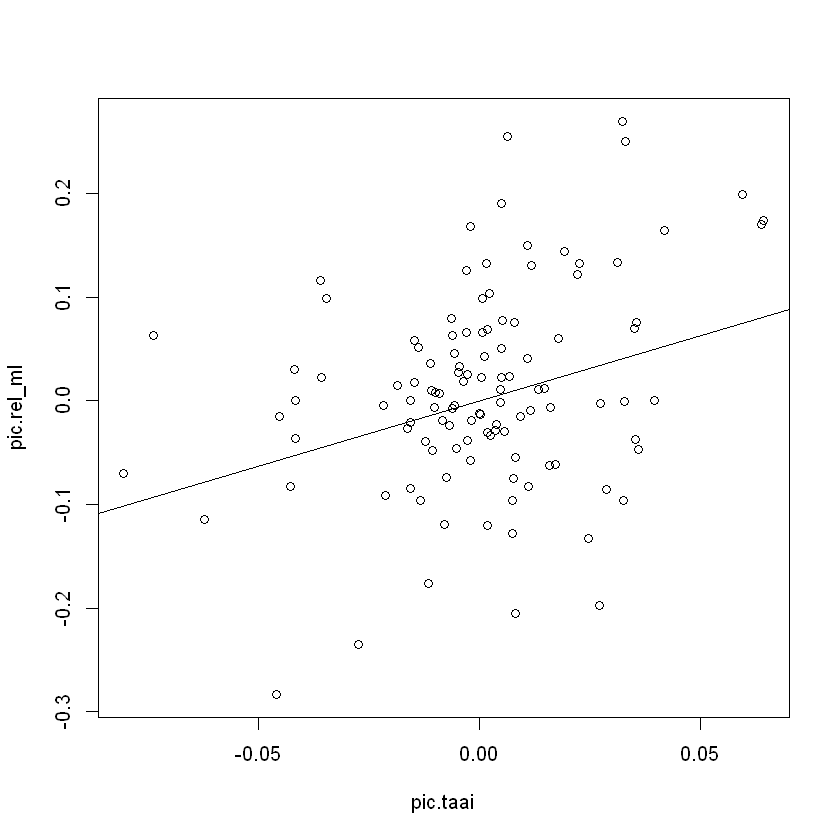

In [40]:
data_filter <- ddata[ddata$mammalia_class!='aquatic',]

prun_data <- prunDataTree(data_filter, 
                          ttree, 
                          list(x1='relative_ML', x2='TAAI_proteome'))
pic_data <- prun_data
print(nrow(prun_data$data))

rel_ml <- setNames(pic_data$data$relative_ML, rownames(pic_data$data))
taai  <- setNames(pic_data$data$TAAI_proteome, rownames(pic_data$data))

# PIC
pic.rel_ml <- pic(rel_ml, pic_data$phy)
pic.taai <- pic(taai, pic_data$phy)


ols.rel_ml.taai <- lm(pic.rel_ml ~ pic.taai-1)
res<- residuals(ols.rel_ml.taai)
res<- res/sqrt(var(res))[1]
outliers <- names(res)[(abs(res)>3)]
print(outliers)

pic.rel_ml <- pic.rel_ml[!names(pic.rel_ml) %in% outliers]
pic.taai <- pic.taai[!names(pic.taai) %in% outliers]

cor.test(pic.rel_ml, pic.taai, method='pearson')
plot(pic.rel_ml ~ pic.taai)
abline(ols.rel_ml.taai)
summary(ols.rel_ml.taai)

### PGLS: ML  ~ GT + TAAI

[1] 116



Call:
phylolm(formula = log(longevity) ~ log(GT) + TAAI_proteome, data = prun_data$data, 
    phy = prun_data$phy, model = "lambda")

   AIC logLik 
113.62 -51.81 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-1.8892 -0.1463  0.1402  0.3964  0.9742 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
lambda : 1
sigma2: 0.00563408 

Coefficients:
              Estimate   StdErr t.value   p.value    
(Intercept)   0.092092 0.763939  0.1205   0.90426    
log(GT)       0.373503 0.069522  5.3724 4.215e-07 ***
TAAI_proteome 0.696315 0.298144  2.3355   0.02128 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.2106	Adjusted R-squared: 0.1966 

Note: p-values and R-squared are conditional on lambda=1.

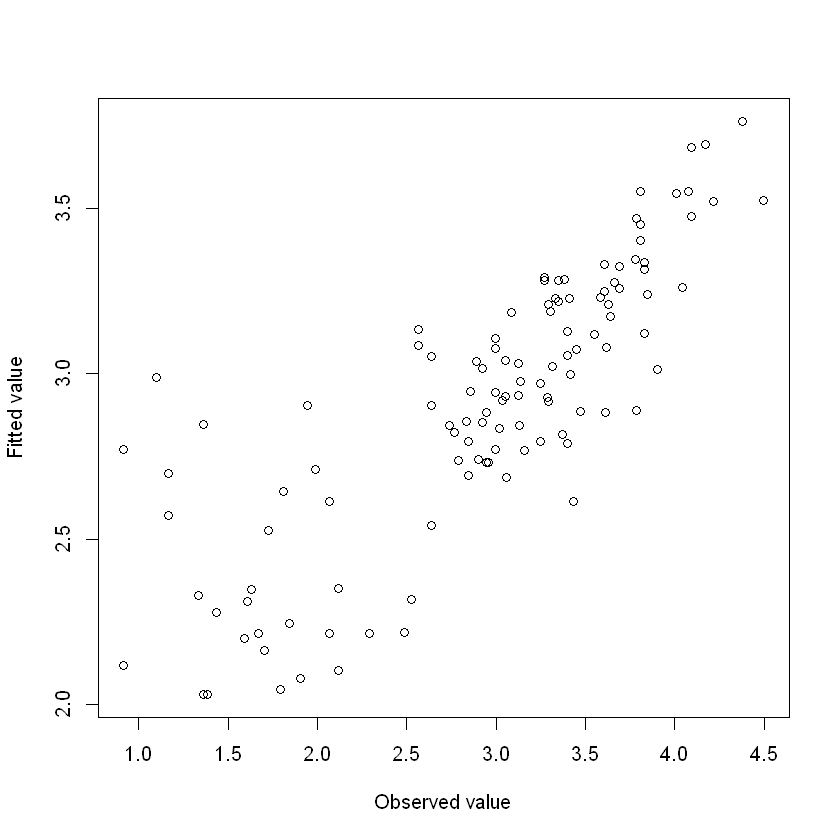

In [41]:
data_filter <- ddata[ddata$mammalia_class!='aquatic',]
# "BM", "OUrandomRoot", "OUfixedRoot", "lambda", "kappa", "delta", "EB"


prun_data <- prunDataTree(data_filter, 
                          ttree, 
                          list(x1='longevity', x2='GT'))
print(nrow(prun_data$data))

pgls.model.taai.ml.gt <- phylolm(log(longevity) ~ log(GT) + TAAI_proteome
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')

summary(pgls.model.taai.ml.gt)
plot(pgls.model.taai.ml.gt)